In [1]:
import pygrib
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import xarray as xr


In [2]:
#gfs on 1degree lat/lon grid from NOMADS server in grib2 format
#obtained from https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20200812/00/
#use get_gfs.csh
date = '20200922' # YYYYMMDD
modelRun = '00' # HH
#specify forecast hour of file
forecastHour = '000' # HHH
#local path
path='/uufs/chpc.utah.edu/common/home/u0035056/atmos6010/data/'+date+modelRun
gFile = '/gfs.t'+modelRun+'z.pgrb2.1p00.f'+forecastHour+'.grib2'
#gFile = '/geavg.t'+modelRun+'z.pgrb2af'+forecastHour+'.grb2'
#gFile = '/gec00.t'+modelRun+'z.pgrb2af'+forecastHour+'.grb2'
#open file using pygrib
grbs = pygrib.open(path+gFile)
#what is in the file?
for g in grbs:
  print (g.typeOfLevel, g.level, g.name, g.shortName,g.validDate, g.analDate, g.forecastTime)

hybrid 1 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
hybrid 1 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
atmosphere 0 Maximum/Composite radar reflectivity refc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Visibility vis 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
unknown 0 Ventilation Rate VRATE 2020-09-22 00:00:00 2020-09-22 00:00:00 0
surface 0 Wind speed (gust) gust 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInPa 40 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
iso

isobaricInhPa 100 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 100 Ozone mixing ratio o3mr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 150 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isoba

isobaricInhPa 550 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Cloud mixing ratio clwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 550 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Geopotential Height gh 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 600 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaric

isobaricInhPa 975 Ice water mixing ratio icmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 975 Rain mixing ratio rwmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 975 Snow mixing ratio snmr 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 975 Graupel (snow pellets) grle 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Temperature t 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Relative humidity r 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Total Cloud Cover tcc 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Vertical velocity w 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Geometric vertical velocity wz 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 U component of wind u 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 V component of wind v 2020-09-22 00:00:00 2020-09-22 00:00:00 0
isobaricInhPa 1000 Absolute vorticity absv 2020-09-22 00:00:00 2020-09-22 00:00:

In [3]:
# get 700 hPa geopotential height
h = grbs.select(shortName='gh',level=700)
# Extract all the values
h7_all = h[0].values
#what are the dimensions? note lat first, lon second
print(np.shape(h7_all))

# Get the lat/lon grids from the grib2 file
lats_all, lons_all = h[0].latlons()

# get 700 hPa u wind
u = grbs.select(shortName='u',level=700)
# Extract the values
u7_all = u[0].values
# get 700 hPa v wind
v = grbs.select(shortName='v',level=700)
# Extract the values
v7_all = v[0].values

grbs.close()

(181, 360)


In [4]:
#make the data more manageable in this case for a US centric sector
#upper left corner lat/lon
ult = 70
uln = 180
#lower right corner lat/lon
rlt = 15
rln = 340
#convert lat/lons to grid indices
ulti = 90-ult
ulni = uln
rlti = 90-rlt
rlni = rln

#truncate the arrays
h7 = h7_all[ulti:rlti,ulni:rlni]
u7 = u7_all[ulti:rlti,ulni:rlni]
v7 = v7_all[ulti:rlti,ulni:rlni]
lats = lats_all[ulti:rlti,ulni:rlni]
lons = lons_all[ulti:rlti,ulni:rlni]

In [5]:
#setup projection
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-97.5,
                               central_latitude=38.5,
                               standard_parallels=(30, 60))

states = cartopy.feature.NaturalEarthFeature(
            category='cultural', scale='50m', facecolor='none',
            name='admin_1_states_provinces_shp')
# Set up the projection for the data
datacrs = ccrs.PlateCarree()
# color maps
rcol = mcm.get_cmap('YlOrBr')
bcol = mcm.get_cmap('GnBu_r')

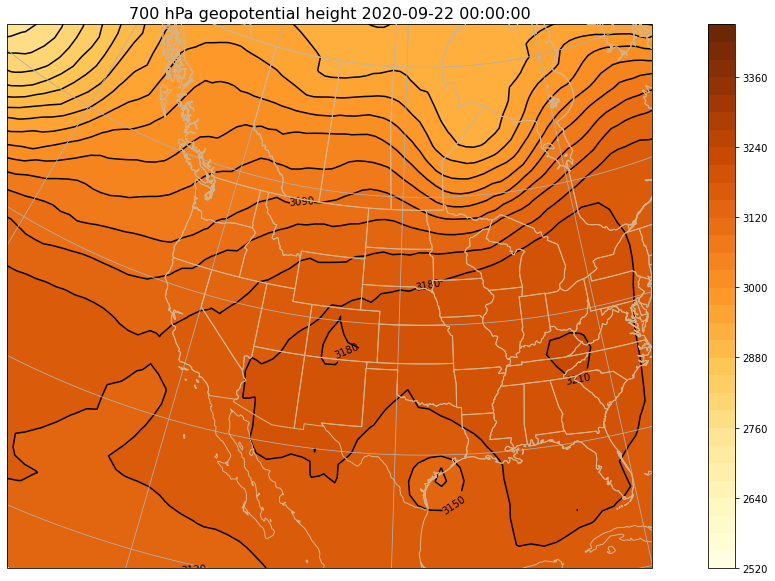

In [6]:
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
ax.set_extent([-130,-80,20,60])
# Plot height field
# select center contour interval, interval, and number of contours
cnt7 = 3000
int7 = 30
no7 = 16
lh7 = cnt7 - no7 * int7
up7 = cnt7 + no7 * int7
cs=ax.contour(lons,lats,h7,levels=range(lh7,up7,int7),transform=ccrs.PlateCarree(),colors='black')
cs1 = ax.contourf(lons,lats,h7,levels=range(lh7,up7,int7),cmap=rcol,transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)


ax.add_feature(states,edgecolor='tan',zorder=99)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99)
ax.gridlines(draw_labels=False)
ax.set_title('700 hPa geopotential height %s' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_700_na_height_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()

In [7]:
# use metpy functions to do the 'heavy lifting'
#https://unidata.github.io/MetPy/
#find the increments in each direction on the grid
dx, dy = mpcalc.lat_lon_grid_deltas(lons,lats)
print(np.shape(dx),np.shape(dy))
#metpy needs units declared for calculations
h7 = h7 * units.meter

#compute coriolis parameter
omega = 7.292*1.E-5
f = 2 * omega * np.sin(np.pi*lats/180.)
f = f / units.second
#compute geostrophic wind
ug7,vg7 = mpcalc.geostrophic_wind(h7, f, dx, dy,dim_order='yx')

(55, 159) (54, 160)


In [8]:
# calculate speed of wind, geostrophic wind, ageostrophic wind
u7 = u7 * units.meter / units.second
v7 = v7 * units.meter / units.second
sp7 = mpcalc.wind_speed(u7, v7)
print('min speed %.1f' % np.min(sp7.m))
print('max speed %.1f' % np.max(sp7.m))
gsp7 = mpcalc.wind_speed(ug7, vg7)
#in the following the '.m' means use the magnitude of the variable
print('min geo speed %.1f' % np.min(gsp7.m))
print('max geo speed %.1f' % np.max(gsp7.m))
# ageostrophic wind
ua7 = u7 - ug7
va7 = v7 - vg7
agsp7 = mpcalc.wind_speed(ua7, va7)
print('min ageo speed %.1f' % np.min(agsp7.m))
print('max ageo speed %.1f' % np.max(agsp7.m))

min speed 0.1
max speed 51.7
min geo speed 0.1
max geo speed 136.2
min ageo speed 0.0
max ageo speed 84.6


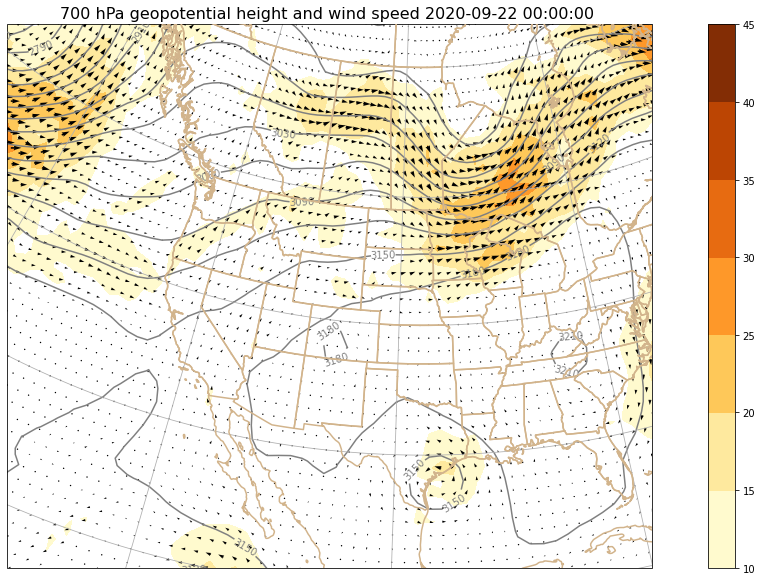

<Figure size 432x288 with 0 Axes>

In [9]:
#plot the winds and heights
fig,ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': mapcrs})
ax.set_extent([-130,-80,20,60])
# Plot height field
h5s = mpcalc.smooth_gaussian(h7,5)
cs=ax.contour(lons,lats,h5s,levels=range(lh7,up7,int7),transform=ccrs.PlateCarree(),colors='grey')
#plot wind speed
cs1 = ax.contourf(lons,lats,sp7,cmap=rcol,levels=range(10,50,5),transform=ccrs.PlateCarree())
cb=plt.colorbar(cs1)
plt.clabel(cs,fmt='%0.f',inline=True)

#plot every third wind vector
skip=(slice(None,None,3),slice(None,None,3))
#plt.quiver(lons[skip],lats[skip],u5.m[skip],v5.m[skip],pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.quiver(lons,lats,u7.m,v7.m,pivot='tail',color='black',transform=ccrs.PlateCarree())
plt.clabel(cs,fmt='%0.f',inline=True)
ax.add_feature(states,edgecolor='tan',zorder=99,linewidth=1.5)
ax.add_feature(cfeature.COASTLINE,edgecolor='tan',zorder=99,linewidth=1.5)
ax.gridlines(draw_labels=False)
ax.set_title('700 hPa geopotential height and wind speed %s ' % g.validDate, fontsize=16)
plot_file = '../figs/gfs_700_na_height_spd_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)
plt.show()
plot_file = '../figs/gfs_700_na_height_' + date + modelRun + forecastHour + '.png'
plt.savefig(plot_file)